In [1]:
import numpy as np
import numpy as np
import matplotlib.pyplot as plt

In [2]:
filename = 'data\\ch4_mlo_surface-insitu_1_ccgg_MonthlyData.txt'
data = np.loadtxt(filename, delimiter=',', skiprows=0, dtype=str)
substraction_variable_amount = 4  #(without the features and the first three values are not correct)
data_amount = len(data) - substraction_variable_amount
print(data_amount)

417


In [3]:
index_used_data_features = [1,2,7,8]
used_data_features = [data[0].split()[i] for i in index_used_data_features]
print(used_data_features)

used_data = np.zeros((data_amount, len(index_used_data_features)))

for i in range(data_amount):
    for j in range(len(index_used_data_features)):
        used_data[i][j] = data[i+ substraction_variable_amount].split()[index_used_data_features[j]]
        
used_data = used_data.T
print(used_data)

['year', 'month', 'time_decimal', 'value']
[[1987.         1987.         1987.         ... 2021.
  2021.         2021.        ]
 [   4.            5.            6.         ...   10.
    11.           12.        ]
 [1987.24657534 1987.32876712 1987.41369863 ... 2021.74794521
  2021.83287671 2021.91506849]
 [1697.19       1699.5        1693.4        ... 1929.52
  1930.32       1933.38      ]]


Text(0, 0.5, 'concentration of CH4 in ppm')

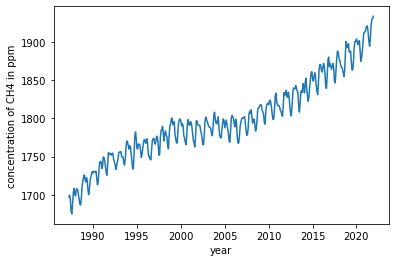

In [4]:
plt.plot(used_data[2], used_data[3])
plt.xlabel('year')
plt.ylabel('concentration of CH4 in ppm')

In [5]:
print('Global min:', np.min(used_data[3]), 'year:', used_data[2][np.argmin(used_data[3])])
print('Global max:', np.max(used_data[3]), 'year:', used_data[2][np.argmax(used_data[3])])

Global min: 1674.99 year: 1987.5808219178082
Global max: 1933.38 year: 2021.9150684931508


1738.9139166666666 1785.7000833333334 1783.8961666666664 1889.0257894736842


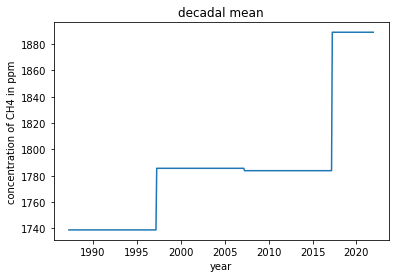

In [6]:
data_means = np.zeros(used_data.shape[1])
mean_number = 120
mean1 = np.mean(used_data[3][0:120])
for i in range(mean_number):
    data_means[i] = mean1
    
mean2 = np.mean(used_data[3][120:2*120])
for i in range(mean_number):
    data_means[i+120] = mean2

mean3 = np.mean(used_data[3][2*0:3*120])
for i in range(mean_number):
    data_means[i+2*120] = mean3

mean4 = np.mean(used_data[3][3*120:])
for i in range(used_data.shape[1]-3*120):
    data_means[i+3*120] = mean4
                
plt.plot(used_data[2], data_means)
plt.title('decadal mean')
plt.xlabel('year')
plt.ylabel('concentration of CH4 in ppm')
print(mean1, mean2, mean3, mean4)

1743.7849999999999 1789.0900000000001 1787.675 1887.81


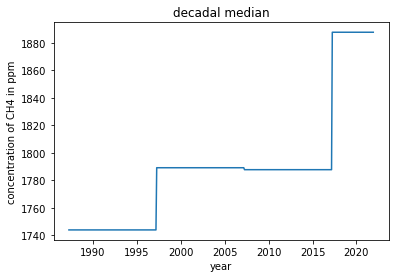

In [7]:
data_medians = np.zeros(used_data.shape[1])
mean_number = 120
median1 = np.median(used_data[3][0:120])
for i in range(mean_number):
    data_medians[i] = median1
    
median2 = np.median(used_data[3][120:2*120])
for i in range(mean_number):
    data_medians[i+120] = median2

median3 = np.median(used_data[3][2*0:3*120])
for i in range(mean_number):
    data_medians[i+2*120] = median3

median4 = np.median(used_data[3][3*120:])
for i in range(used_data.shape[1]-3*120):
    data_medians[i+3*120] = median4
                
plt.plot(used_data[2], data_medians)
plt.title('decadal median')
plt.xlabel('year')
plt.ylabel('concentration of CH4 in ppm')
print(median1, median2, median3, median4)

In [8]:
print('Global min:', np.min(used_data[3]), 'year:', used_data[2][np.argmin(used_data[3])])
print('Global max:', np.max(used_data[3]), 'year:', used_data[2][np.argmax(used_data[3])])

Global min: 1674.99 year: 1987.5808219178082
Global max: 1933.38 year: 2021.9150684931508


In [19]:
variation = np.zeros(int(used_data.shape[1]/12))
print(variation.shape)
for i in range(int(used_data.shape[1]/12)):
    for j in range(12):
        variation[i] = np.max(used_data[3][i*12:(i+1)*12]) - np.min(used_data[3][i*12:(i+1)*12])
    
print("Mean variation:", np.mean(variation), 'ppm')

(34,)
Mean variation: 35.410588235294135 ppm


Thus, the flux of Methan has tu vary around 35 ppm during a seasonal cycle.

In [20]:
groth1 = (mean2-mean1)/10

## Temperature Data


In [10]:
filename2 = 'data\\SurfaceTemp.txt'
data2 = np.loadtxt(filename2, delimiter=',', skiprows=0, dtype=str)
print(data2)

['  Year  Month   Anomaly  Unc.    Anomaly  Unc.    Anomaly  Unc.    Anomaly  Unc.    Anomaly Unc.'
 '  1850     1    -0.769  0.367       NaN    NaN       NaN    NaN       NaN    NaN       NaN    NaN'
 '  1850     2    -0.227  0.505       NaN    NaN       NaN    NaN       NaN    NaN       NaN    NaN'
 ...
 '  2023     1     0.925  0.043       NaN    NaN       NaN    NaN       NaN    NaN       NaN    NaN'
 '  2023     2     0.988  0.041       NaN    NaN       NaN    NaN       NaN    NaN       NaN    NaN'
 '  2023     3     1.237  0.052       NaN    NaN       NaN    NaN       NaN    NaN       NaN    NaN']


In [11]:
index_used_data_features2 = [0,1,2]
used_data_features2 = [data2[0].split()[i] for i in index_used_data_features2]
print(used_data_features2)
print(len(data2))

['Year', 'Month', 'Anomaly']
2080


In [12]:
data_amount2 = len(data2) - 1
used_data2 = np.zeros((data_amount2, len(index_used_data_features2)))

for i in range(data_amount2):
    for j in range(len(index_used_data_features2)):
        used_data2[i][j] = data2[i+ 1].split()[index_used_data_features2[j]]
        
used_data2 = used_data2.T
print(used_data2)
print(used_data2[2][:20])

[[ 1.850e+03  1.850e+03  1.850e+03 ...  2.023e+03  2.023e+03  2.023e+03]
 [ 1.000e+00  2.000e+00  3.000e+00 ...  1.000e+00  2.000e+00  3.000e+00]
 [-7.690e-01 -2.270e-01 -3.740e-01 ...  9.250e-01  9.880e-01  1.237e+00]]
[-0.769 -0.227 -0.374 -0.591 -0.623 -0.359 -0.184 -0.168 -0.429 -0.607
 -0.589 -0.501 -0.177 -0.421 -0.563 -0.62  -0.328 -0.264 -0.22  -0.314]


In [13]:
time2 = np.zeros(data_amount2)
for i in range(data_amount2):
    time2[i] = used_data2[0][i] + (used_data2[1][i]-1)*1/12
print(time2[:20])

mean_for_anomaly = 14.104
Delta_mean_for_anomaly = 0.024
real_temp = used_data2[2] + mean_for_anomaly

[1850.         1850.08333333 1850.16666667 1850.25       1850.33333333
 1850.41666667 1850.5        1850.58333333 1850.66666667 1850.75
 1850.83333333 1850.91666667 1851.         1851.08333333 1851.16666667
 1851.25       1851.33333333 1851.41666667 1851.5        1851.58333333]


Text(0, 0.5, 'temperature')

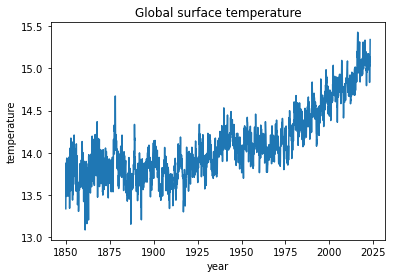

In [14]:

plt.plot(time2, real_temp)
plt.title('Global surface temperature')
plt.xlabel('year')
plt.ylabel('temperature')


In [15]:
print('Global min:', np.min(used_data2[2]), 'year:', used_data2[0][np.argmin(used_data2[2])],
      'month:', used_data2[1][np.argmin(used_data2[2])])
print('Global max:', np.max(used_data2[2]), 'year:', used_data2[0][np.argmax(used_data2[2])],
      'month:', used_data2[1][np.argmax(used_data2[2])])

Global min: -1.02 year: 1861.0 month: 1.0
Global max: 1.324 year: 2016.0 month: 2.0


1738.9139166666666 1785.7000833333334 1783.8961666666664 1889.0257894736842


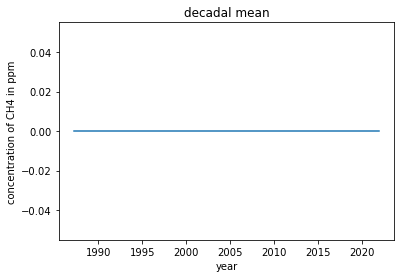

In [16]:
data_means = np.zeros(used_data.shape[1])
mean_number = 120

                
plt.plot(used_data[2], data_means)
plt.title('decadal mean')
plt.xlabel('year')
plt.ylabel('concentration of CH4 in ppm')
print(mean1, mean2, mean3, mean4)

In [22]:
# Notes:

mean1_2 = np.mean(used_data2[2][0:120])
for i in range(mean_number):
    data_means[i] = mean1_2
    
mean2_2 = np.mean(used_data2[2][120:2*120])
for i in range(mean_number):
    data_means[i+120] = mean2_2

mean3_2 = np.mean(used_data2[2][2*0:3*120])
for i in range(mean_number):
    data_means[i+2*120] = mean3_2

mean4_2 = np.mean(used_data2[2][3*120:])
for i in range(used_data.shape[1]-3*120):
    data_means[i+3*120] = mean4_2

<ipython-input-35-872e8095a77a>:7: RuntimeWarning: overflow encountered in exp
  return a*np.exp(b*x+ c) + d


RuntimeError: Optimal parameters not found: Number of calls to function has reached maxfev = 100000.

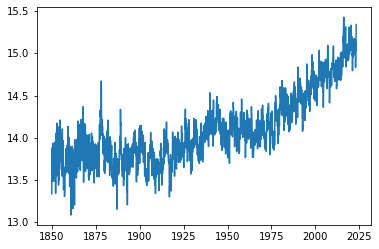

In [35]:
from scipy.optimize import curve_fit

def function(x, a, b, c):
    return a*x**2 + b*x + c

def exponential(x, a, b, c, d):
    return a*np.exp(b*x+ c) + d

plt.plot(time2, real_temp)
popt, pcov=curve_fit(exponential, time2, real_temp, p0=(0.03, 1, 1, 14) , maxfev = 100000)
plt.plot(time2, exponential(time2,*popt))